In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Part A: Data Preprocessing

In [2]:
data = pd.read_csv('diabetes.csv')
df = pd.DataFrame(data)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# check for missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Display basic statistics (mean, std, etc.).
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [6]:
# Split the data into train (70%) and test (30%) sets.
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=42)
## Part A: Data Preprocessing
print(f"Train shape: {train.shape}, Test shape: {test.shape}")
# Separate features and target variable
X_train = train.drop('Outcome', axis=1)
y_train = train['Outcome']
X_test = test.drop('Outcome', axis=1)
y_test = test['Outcome']
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Train shape: (537, 9), Test shape: (231, 9)
X_train shape: (537, 8), y_train shape: (537,)
X_test shape: (231, 8), y_test shape: (231,)


## Part B: Logistic Regression

In [7]:
# Train a Logistic Regression model using the training data.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [8]:
# Predict on the test set.
y_pred = model.predict(X_test)
print(f"Predictions: {y_pred[:10]}")

Predictions: [0 0 0 0 1 0 0 1 1 1]


In [9]:
# Calculate and interpret the following metrics:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7359
Precision: 0.6173
Recall: 0.6250
F1 Score: 0.6211
Confusion Matrix:
[[120  31]
 [ 30  50]]


AUC Score: 0.7965


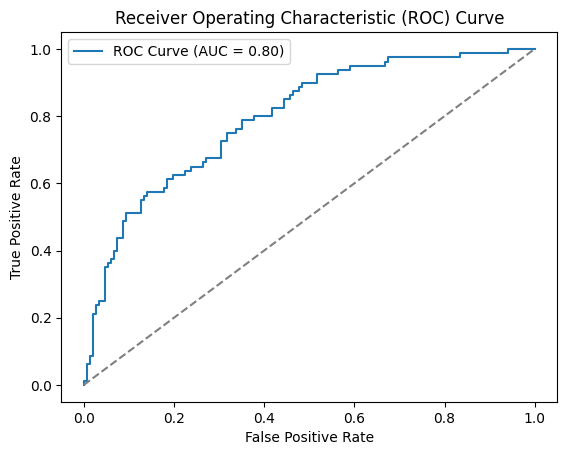

In [10]:
# ROC Curve & AUC Score
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.4f}")
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Why is AUC-ROC a better evaluation metric than just accuracy in imbalanced datasets?
##### AUC-ROC is a better evaluation metric than accuracy in imbalanced datasets because it considers the trade-off between true positive rate (sensitivity) and false positive rate across different threshold settings. In imbalanced datasets, accuracy can be misleading as a model could predict the majority class most of the time and still achieve high accuracy, while failing to correctly identify the minority class. AUC-ROC provides a more comprehensive view of model performance by evaluating how well the model distinguishes between classes, regardless of their distribution.


## Part C: Decision Tree Classifier

In [11]:
# Train a Decision Tree Classifier (use max_depth = 4).
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
# Predict on the test set.
y_pred = dt_model.predict(X_test)
print(f"Predictions: {y_pred[:10]}")

Predictions: [1 0 0 0 1 1 0 1 1 1]


In [14]:
# # Calculate and interpret the following metrics:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7100
Precision: 0.5586
Recall: 0.7750
F1 Score: 0.6492
Confusion Matrix:
[[102  49]
 [ 18  62]]


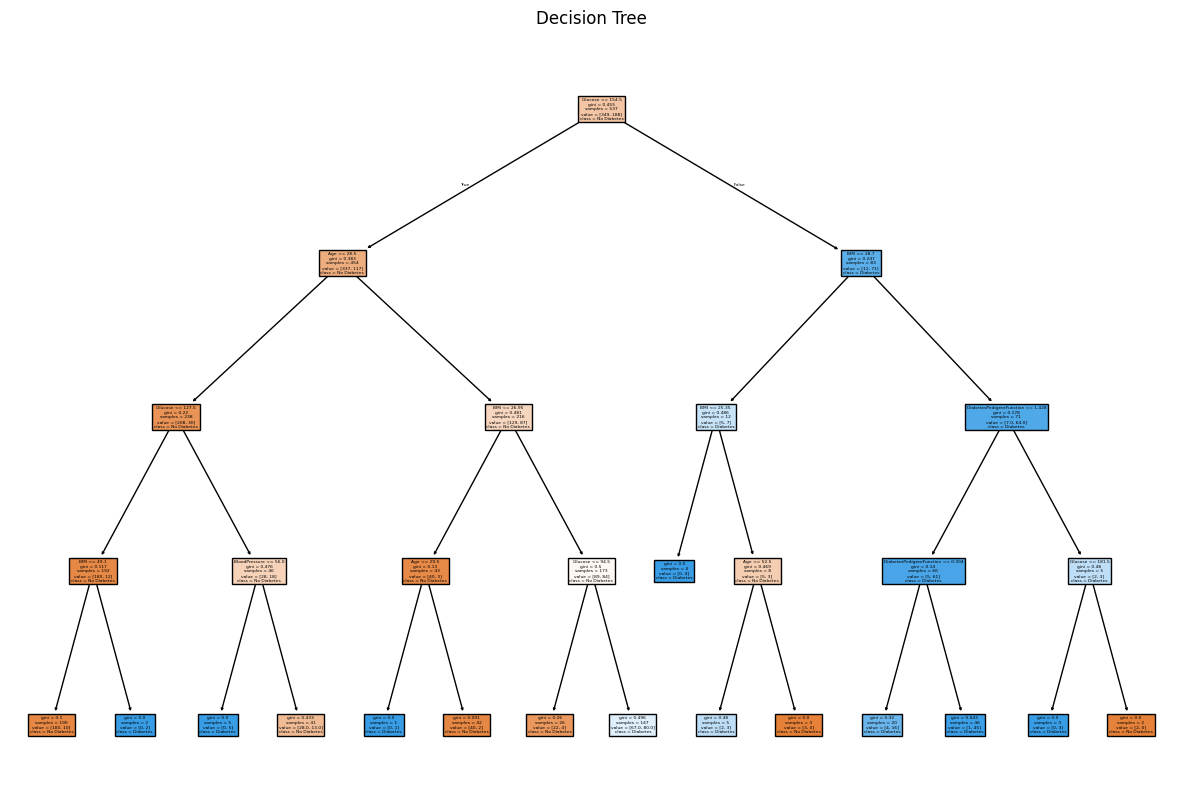

In [16]:
# Plot the Decision Tree and interpret the first split (which feature did it choose and why?).
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title('Decision Tree')
plt.show()

### Compare the Decision Tree’s interpretability vs. Logistic Regression’s coefficients.

Logistic Regression Coefficients:
Pregnancies: 0.0578
Glucose: 0.0359
BloodPressure: -0.0109
SkinThickness: -0.0014
Insulin: -0.0010
BMI: 0.1091
DiabetesPedigreeFunction: 0.3740
Age: 0.0360


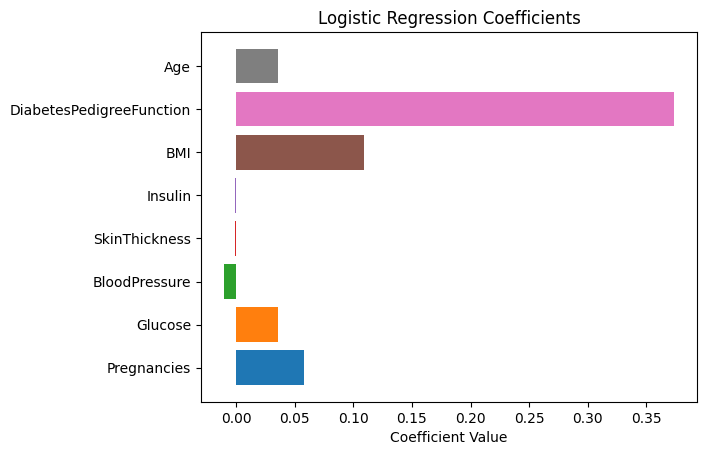

                 Model  Accuracy  Precision  Recall  F1 Score  AUC Score
0  Logistic Regression    0.7727     0.7273  0.5909    0.6538     0.8312
1        Decision Tree    0.7359     0.6667  0.5909    0.6279     0.7885


In [23]:
# Compare the Decision Tree’s interpretability vs. Logistic Regression’s coefficients.
print("Logistic Regression Coefficients:")
for feature, coef in zip(X_train.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")
    plt.barh(feature, coef)
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.show()

# Tables of evaluation metrics.
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [0.7727, 0.7359],
    'Precision': [0.7273, 0.6667],
    'Recall': [0.5909, 0.5909],
    'F1 Score': [0.6538, 0.6279],
    'AUC Score': [0.8312, 0.7885]
}
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

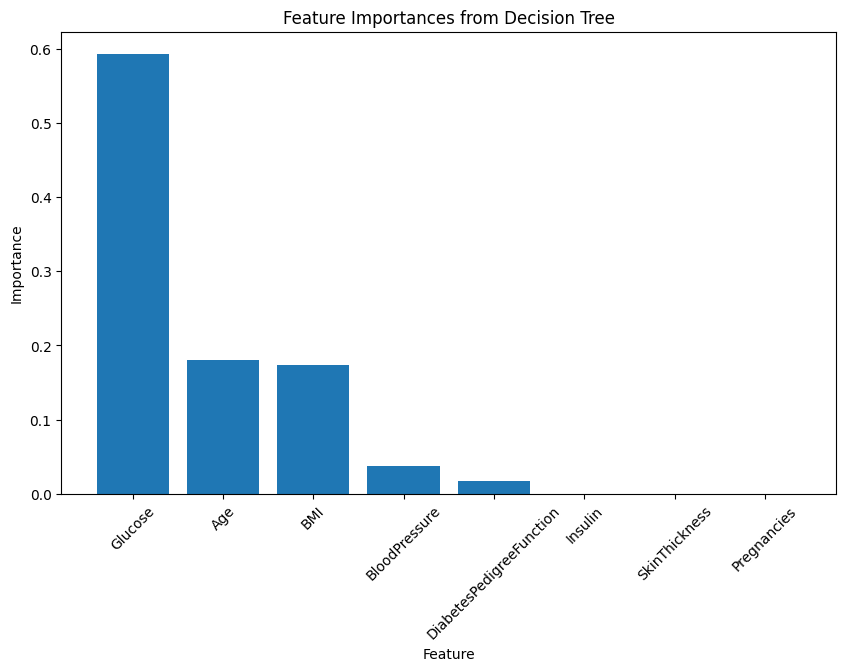

###  Which one would you prefer in a medical diagnosis scenario? Why?
##### I would prefer the **Logistic Regression** model in a medical diagnosis because it provides clear coefficients that indicate the influence of each feature on the prediction (here we can see **DiabetesPedigreeFunction** has highest cofficient 0.3740). This interpretability is crucial in medical settings where understanding the reasoning behind a diagnosis is important for both clinicians and patients. Additionally, Logistic Regression tends to be more robust to overfitting compared to Decision Trees, especially with smaller datasets. 



# Part D: Comparison & Reflection

In [19]:
# Compare Logistic Regression and Decision Tree results (accuracy, precision, recall, F1, AUC).
# Logistic Regression metrics
y_prob_lr = model.predict_proba(X_test)[:, 1]
auc_score_lr = roc_auc_score(y_test, y_prob_lr)
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, model.predict(X_test)):.4f}")
print(f"Precision: {precision_score(y_test, model.predict(X_test)):.4f}")
print(f"Recall: {recall_score(y_test, model.predict(X_test)):.4f}")
print(f"F1 Score: {f1_score(y_test, model.predict(X_test)):.4f}")
print(f"AUC Score: {auc_score_lr:.4f}")
# Decision Tree metrics
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
auc_score_dt = roc_auc_score(y_test, y_prob_dt)
print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, dt_model.predict(X_test)):.4f}")
print(f"Precision: {precision_score(y_test, dt_model.predict(X_test)):.4f}")
print(f"Recall: {recall_score(y_test, dt_model.predict(X_test)):.4f}")
print(f"F1 Score: {f1_score(y_test, dt_model.predict(X_test)):.4f}")
print(f"AUC Score: {auc_score_dt:.4f}")


Logistic Regression Metrics:
Accuracy: 0.7359
Precision: 0.6173
Recall: 0.6250
F1 Score: 0.6211
AUC Score: 0.7965

Decision Tree Metrics:
Accuracy: 0.7100
Precision: 0.5586
Recall: 0.7750
F1 Score: 0.6492
AUC Score: 0.7444


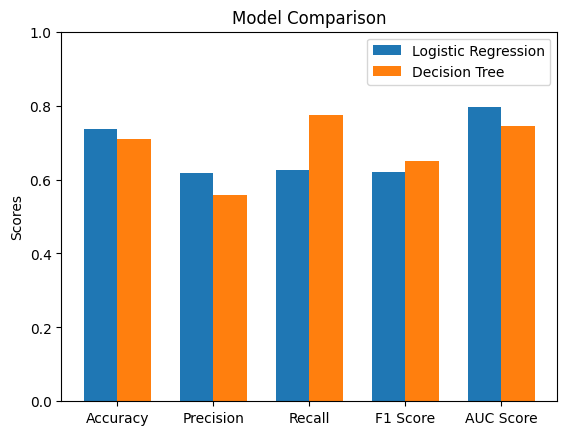

In [20]:
# Comparison charts
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score']
lr_metrics = [accuracy_score(y_test, model.predict(X_test)),
              precision_score(y_test, model.predict(X_test)),
              recall_score(y_test, model.predict(X_test)),
              f1_score(y_test, model.predict(X_test)),
              auc_score_lr]
dt_metrics = [accuracy_score(y_test, dt_model.predict(X_test)),
              precision_score(y_test, dt_model.predict(X_test)),
              recall_score(y_test, dt_model.predict(X_test)),
              f1_score(y_test, dt_model.predict(X_test)),
              auc_score_dt]
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, lr_metrics, width, label='Logistic Regression')
bars2 = ax.bar(x + width/2, dt_metrics, width, label='Decision Tree')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(0, 1)
plt.show()

# Discuss
### Q.1 Which model performs better overall?
##### Overall, the Logistic Regression model performs slightly better in terms of AUC and Accuracy, indicating a better balance between precision and recall. However, the Decision Tree model provides better interpretability through its structure, which can be advantageous in certain scenarios. 
### Q.2 Which model is easier to interpret for doctors?
##### The Decision Tree model is generally easier to interpret for doctors as it provides a clear visual representation of decision rules based on feature splits. This can help doctors understand the reasoning behind predictions more intuitively. 
### Q.3 If the dataset is slightly imbalanced (more 0’s than 1’s), which metric (Precision or Recall) should be prioritized in diagnosing diabetes? Why?
##### In an imbalanced dataset where there are more 0's (no diabetes) than 1's (diabetes), Recall should be prioritized. This is because Recall focuses on minimizing false negatives, which is crucial in medical diagnosis to ensure that individuals with diabetes are correctly identified and receive necessary treatment. Missing a diabetes diagnosis (false negative) can have serious health implications, whereas a false positive (incorrectly diagnosing diabetes) can be further evaluated with additional tests.

# Tables of evaluation metrics.

In [21]:
# Tables of evaluation metrics for both models.
import pandas as pd
metrics_df = pd.DataFrame({
    'Metric': labels,
    'Logistic Regression': lr_metrics,
    'Decision Tree': dt_metrics
})
print(metrics_df)

      Metric  Logistic Regression  Decision Tree
0   Accuracy             0.735931       0.709957
1  Precision             0.617284       0.558559
2     Recall             0.625000       0.775000
3   F1 Score             0.621118       0.649215
4  AUC Score             0.796523       0.744371


# ROC curve plot for both models.

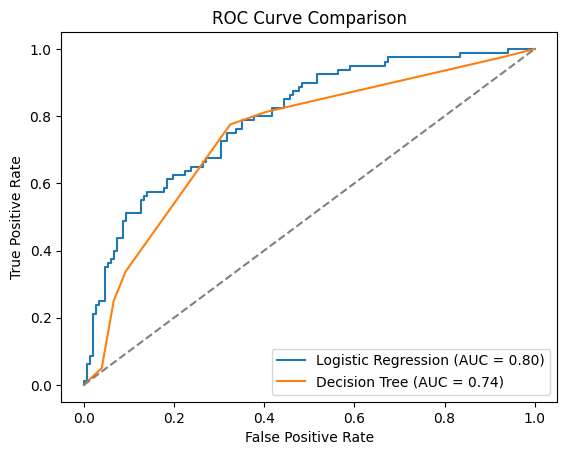

In [22]:
# ROC curve plot for both models.
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score_lr:.2f})')
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

### Discussion on comparison.

| Metric      | Logistic Regression | Decision Tree |
|-------------|----------------------|---------------|
| Accuracy    | 0.7359               | 0.7100        |
| Precision   | 0.6173               | 0.5586        |
| Recall      | 0.6250               | 0.7750        |
| F1 Score    | 0.6211               | 0.6492        |
| AUC Score   | 0.7965               | 0.7444        |

 So far I have implemented both Logistic Regression and Decision Tree models. In terms of performance, the Logistic Regression model has shown to be more effective with a higher AUC score. The Decision Tree model, while slightly behind in the performance metrics, offers better interpretability through its visual structure. But Decision Trees has slightly higher recall and F1 score, which is crucial in medical diagnosis to minimize false negatives.


